# External Validity Check

In this notebook the external validity of specific topics is evaluated through the plotting of attention to the given topic over the entire 33 year period covered by the corpus.

In [241]:
import pandas as pd
import datetime
from plotnine import ggplot, aes, geoms, scales, theme, ggtitle, xlim
from plotnine import element_blank,element_line,element_rect,element_text, ylab, xlab

In [2]:
df = pd.read_csv('Results/All_speeches_labelled.csv')

In [6]:
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']

In [243]:
sub = df.loc[df.dynamic_label.isin(['disaster_relief','disasters'])]
sub_grouped = sub.groupby(pd.Grouper(freq='M')).speech_id.count().reset_index()

In [247]:
X = (
    ggplot(sub_grouped, aes(x = 'date',y='speech_id')) + 
    geoms.geom_bar(stat='identity') +
    theme(figure_size=(12,3),
          panel_background=element_blank(),
          axis_line=element_line()) +
    scales.scale_y_continuous(expand=[0,0]) +
    ylab('Monthly Speech Frequency') +
    xlab('Date') +
    scales.scale_x_datetime(date_breaks='2 years',date_labels='%Y',limits=[datetime.date(1983,1,1), datetime.date(2016,12,31)]) +
    ggtitle("Disasters")
)

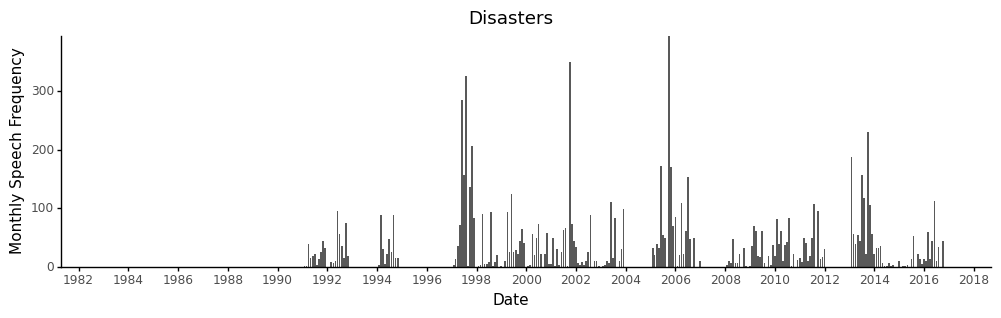

<ggplot: (8753389114141)>

In [248]:
X

In [199]:
X.save('Results/disasters.png',dpi=1000)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 12 x 3 in image.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Results/disasters.png


### Closer interrogation of spikes for historical context

In [219]:
guns.groupby(pd.Grouper(freq='W')).speech_id.count().reset_index().sort_values(by='speech_id',ascending=False).head(15)

,date,speech_id
557,2001-09-16,334
339,1997-07-13,172
1184,2013-09-22,159
765,2005-09-11,142
1149,2013-01-20,138
331,1997-05-18,113
330,1997-05-11,111
749,2005-05-22,104
766,2005-09-18,103
393,1998-07-26,90


In [249]:
sub.loc[(sub.date.dt.month.isin([7])) &
        (sub.date.dt.year == 1997) &
        (sub.date.dt.day > 10),'speech_text'].sample().values

array(['No. that is the World Heritage preserves. All treaties. all treaties have to have implementing language and also appropriations that come from authorizing. that is. if we would look at the Camp David accords. we do not just automatically let the State Department spend what they want to spend on it.'],
      dtype=object)